<a href="https://colab.research.google.com/github/jyoti-chn/Appartment-Complex-Reccomendation-System/blob/main/Data_Analysis_Appartment_Recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# exploratory data analysing
file_path = '/content/Bengaluru_House_Data.csv'
housing_data = pd.read_csv(file_path)

housing_data.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
pip install pydantic-settings

In [ ]:
from ydata_profiling import ProfileReport

# Generate a report
profile = ProfileReport(housing_data, minimal=True)
profile.to_file(output_file = "dataAnalysis.html")

ModuleNotFoundError: No module named 'ydata_profiling'

In [ ]:
profile.to_widgets()

In [ ]:
def convert_sqft_to_num(x):
    tokens = str(x).split('-')
    if len(tokens) == 2:
        # print(x)
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

housing_data['total_sqft'] = housing_data['total_sqft'].apply(convert_sqft_to_num)

<Axes: >

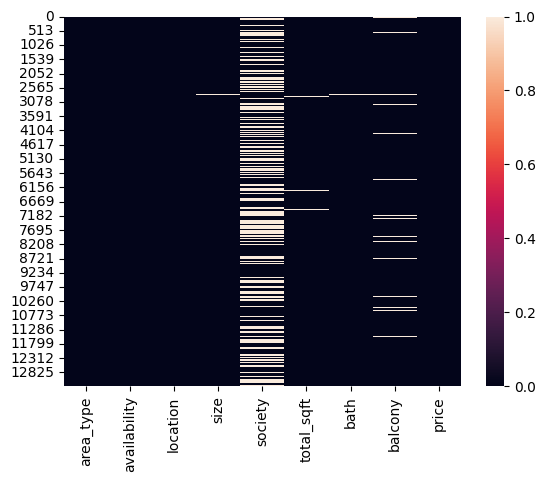

In [ ]:
import seaborn as sns
sns.heatmap(housing_data.isnull())

In [ ]:
# since society attribute is almost empty we will drop the that column.
housing_data.drop('society',axis=1,inplace=True)

housing_data.location.replace(to_replace=np.NaN,value=housing_data.location.mode()[0],inplace=True)
housing_data.area_type.replace(to_replace=np.NaN,value=housing_data.area_type.mode()[0],inplace=True)



In [ ]:
housing_data['size']=housing_data['size'].str.split(' ',expand=True)[0].astype(np.number)
housing_data.bath=housing_data.bath.astype(np.number)

In [ ]:
housing_data.availability=(housing_data.availability=='Ready To Move')
housing_data.availability.replace({True:1,False:0},inplace=True)
housing_data.availability=housing_data.availability.astype(object)

In [ ]:
housing_data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [ ]:
housing_data_non_num=housing_data.select_dtypes(object)
housing_data_num=housing_data.select_dtypes(np.number)


In [ ]:
housing_data.isnull().sum()

area_type         0
availability      0
location          0
size             16
total_sqft       46
bath             73
balcony         609
price             0
dtype: int64

<Axes: >

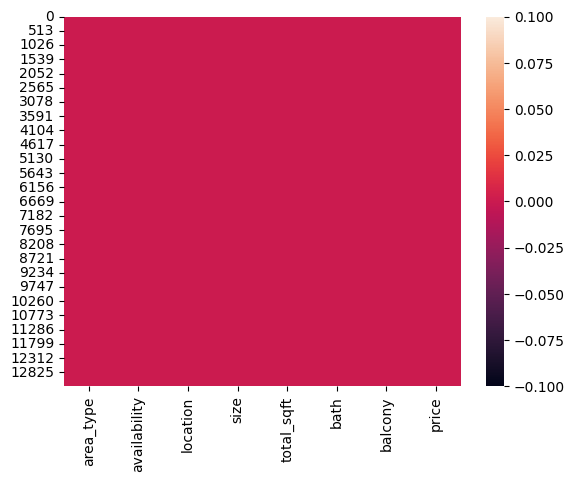

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

imputer.fit(housing_data_num)

# make tranformation on the dataset
housing_data_num_impute = pd.DataFrame(imputer.transform(housing_data_num),columns=housing_data_num.columns)
housing_data=pd.concat([housing_data_non_num,housing_data_num_impute],axis=1)
sns.heatmap(housing_data.isnull())


In [ ]:
housing_data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

<Axes: >

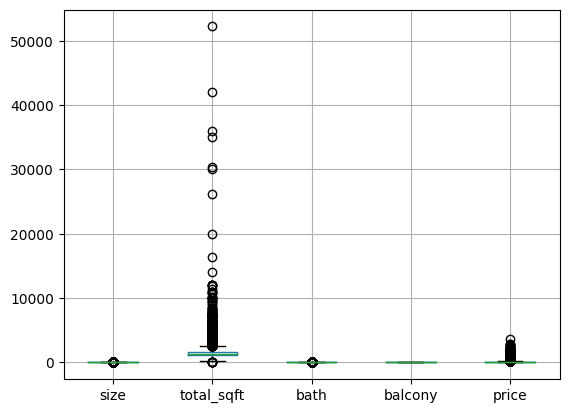

In [ ]:
# removing outliers

housing_data.boxplot()

<ipython-input-13-096172411e3c>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = housing_data.quantile(0.25)
<ipython-input-13-096172411e3c>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = housing_data.quantile(0.75)
<ipython-input-13-096172411e3c>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  housing_data = housing_data[~((housing_data) > (q3 + (1.5 * IQR))).any(axis=1)]


<Axes: >

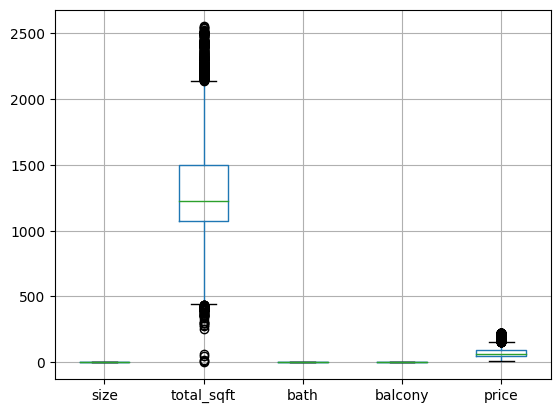

In [ ]:
q1 = housing_data.quantile(0.25)
q3 = housing_data.quantile(0.75)
IQR = q3-q1
IQR

housing_data = housing_data[~((housing_data) > (q3 + (1.5 * IQR))).any(axis=1)]

housing_data.boxplot()


In [ ]:
housing_data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00
5,Super built-up Area,1,Whitefield,2.0,1170.0,2.0,1.0,38.00


In [ ]:
# normalization
from sklearn.preprocessing import StandardScaler

housing_data_non_num=housing_data.select_dtypes(exclude=np.number)
housing_data_num=housing_data.select_dtypes(np.number)
housing_data_non_num=housing_data_non_num.reset_index()

ss=StandardScaler()
housing_data_num_scaled=pd.DataFrame(ss.fit_transform(housing_data_num),columns=housing_data_num.columns)
housing_data_num_scaled=housing_data_num_scaled.reset_index()
housing_data_num_scaled.head()

housing_data_scaled=pd.concat([housing_data_num_scaled,housing_data_non_num],axis=1).drop('index',axis=1)
housing_data_scaled.head()


,size,total_sqft,bath,balcony,price,area_type,availability,location
0,-0.644864,-0.626469,-0.438001,-0.707662,-0.900216,Super built-up Area,0,Electronic City Phase II
1,0.838951,0.384541,-0.438001,1.870800,-0.305167,Built-up Area,1,Uttarahalli
2,0.838951,0.597801,1.064814,-0.707662,0.551207,Super built-up Area,1,Lingadheeranahalli
3,-0.644864,-0.247340,-0.438001,-0.707662,-0.590624,Super built-up Area,1,Kothanur
4,-0.644864,-0.326325,-0.438001,-0.707662,-0.927984,Super built-up Area,1,Whitefield


In [ ]:

data_encoded = pd.get_dummies(housing_data,columns=['area_type','location'])
data_encoded_normalised=pd.get_dummies(housing_data_scaled,columns=['area_type','location'])
data_encoded_normalised.head()

,size,total_sqft,bath,balcony,price,availability,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,location_mvj engineering college,location_pavitra paradise,location_poornaprajna layout,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_singapura paradise,location_tc.palya,location_whitefiled
0,-0.644864,-0.626469,-0.438001,-0.707662,-0.900216,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.838951,0.384541,-0.438001,1.870800,-0.305167,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.838951,0.597801,1.064814,-0.707662,0.551207,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.644864,-0.247340,-0.438001,-0.707662,-0.590624,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.644864,-0.326325,-0.438001,-0.707662,-0.927984,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_encoded_normalised.to_csv("cleaned_housing_data_scaled_normalized.csv")

In [ ]:
data_encoded.to_csv("cleaned_housing_data_scaled.csv")